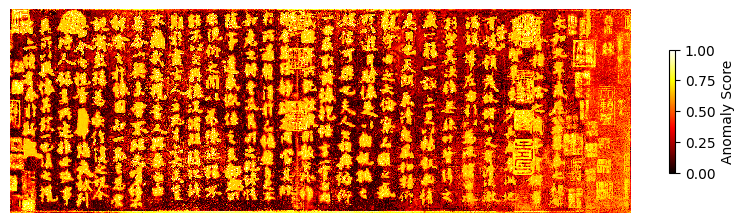

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pyod.models.inne import INNE
from sklearn.preprocessing import MinMaxScaler
from svead import SVEAD

img = Image.open('image.jpg')
img_np = np.array(img)
pixels = img_np.reshape(-1, 3)

iforest = INNE(max_samples=8)
iforest.fit(pixels)
scores = iforest.decision_function(pixels)

scaler = MinMaxScaler()
scores_norm = scaler.fit_transform(scores.reshape(-1, 1)).flatten()
scores_2d = scores_norm.reshape(img_np.shape[0], img_np.shape[1])


plt.figure(figsize=(10, 8))
plt.imshow(scores_2d, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(label='Anomaly Score', shrink=0.2)
plt.axis('off')
# plt.savefig('heatmap.png', dpi=600, bbox_inches='tight')
plt.show()


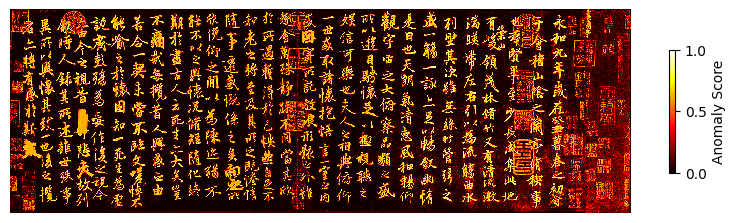

In [2]:
svead = SVEAD(max_samples=8)
svead.fit(pixels)
scores = svead.decision_function(pixels)

scaler = MinMaxScaler()
scores_norm = scaler.fit_transform(scores.reshape(-1, 1)).flatten()
scores_2d = scores_norm.reshape(img_np.shape[0], img_np.shape[1])


plt.figure(figsize=(10, 8))
plt.imshow(scores_2d, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(label='Anomaly Score', shrink=0.2)
plt.axis('off')
# plt.savefig('heatmap.png', dpi=600, bbox_inches='tight')
plt.show()